![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Integrando funções menos regulares

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def midpoint(f, a, b, n=1000):
    dx = (b - a) / n
    xis = np.linspace(a, b, n, endpoint=False)
    return np.sum(f(xis + dx/2))*dx

def simpson(f, a, b, n=1000):
    dx = (b - a) / n
    xis = np.linspace(a, b, n, endpoint=False)
    return np.sum(f(xis) + 4*f(xis + dx/2) + f(xis + dx))*dx/6

In [3]:
def f(x):
    return np.abs(np.sin(x))

## Questão 1: Primitiva

Dê uma primitiva analítica de $f$.

Dica: use a função `divmod` do python.

In [4]:
def F(x):
    floor_of_x_over_pi = np.floor(x / np.pi)
    return 2*floor_of_x_over_pi - np.cos(x)*(-1)**floor_of_x_over_pi

In [5]:
assert np.isclose(F(10+0.1), F(10) + 0.1 * f(10), atol=1e-2)

In [6]:
assert np.isclose(F(2+0.01), F(2) + 0.01 * f(2), atol=1e-4)

In [7]:
ts = np.linspace(0,10, num=200)
Fts = F(ts)
assert np.all(Fts[1:] > Fts[:-1])

## Questão 2: Erros

Faça um gráfico dos erros de integração de $f$
pelos métodos do ponto médio e Simpson, no intervalo $[0,3]$

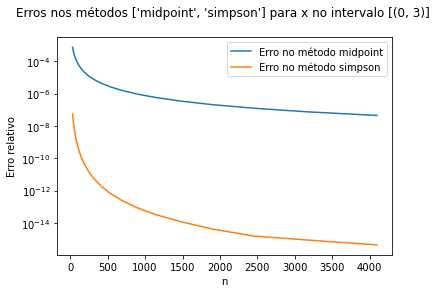

In [8]:
a, b = 0, 3
exact_answer = F(b) - F(a)
ns = np.logspace(5, 12, num=20, dtype=int, base=2)
methods = [midpoint, simpson]

ax = plt.gca()

def get_methods_errs_for_ns(f, a, b, ns, methods, answer):
    methods_errs = {}
    for n in ns:
        for method in methods:
            err = abs(answer - method(f, a, b, n))
            try:
                methods_errs[method] = np.append(methods_errs[method], [err])
            except KeyError:
                methods_errs[method] = np.array([err])
        
    return methods_errs

def plot_methods_errs_for_ns(f, a, b, ns, methods, answer, semilog=False):   
    def plot_errs(methods_errs):
        idx = 0
        for method, errs in methods_errs.items():
            label = f"Erro no método {method.__name__}"
            if semilog == True:
                plt.semilogy(ns, errs, label=label)
            else:
                plt.plot(ns, errs, label=label)
            idx += 1
        
        plt.title(f"Erros nos métodos {[method.__name__ for method in methods]} para x no intervalo [{a, b}] \n")
        plt.xlabel("n")
        plt.ylabel("Erro relativo")
        plt.legend()
           
    methods_errs = get_methods_errs_for_ns(f, a, b, ns, methods, answer)
    plot_errs(methods_errs)
    
plot_methods_errs_for_ns(f, a, b, ns, methods, exact_answer, semilog=True)
plt.show()

In [9]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

Agora, repita o gráfico para o intervalo $[0,6]$:

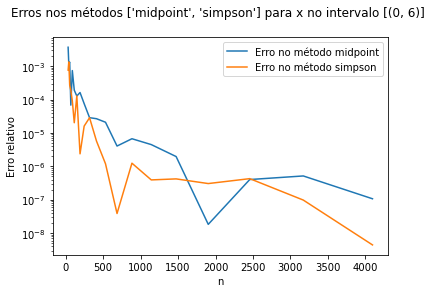

In [10]:
ax = plt.gca()

a, b = 0, 6
exact_answer = F(b) - F(a)
plot_methods_errs_for_ns(f, a, b, ns, methods, exact_answer, semilog=True)  

In [11]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [12]:
for l in ax.lines:
    assert 1e-10 < min(l.get_ydata()) < 1e-7

Como esse gráfico é diferente do outro?

Erros são maiores para ambos casos e, para o método de Simpson, são necessárias mais iterações/divisões para convergir à resposta.

Faça para mais um intervalo.

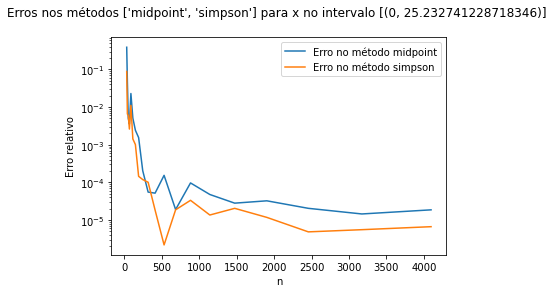

In [13]:
a, b = 0, 8*np.pi + 0.1
exact_answer = F(b) - F(a)
plot_methods_errs_for_ns(f, a, b, ns, methods, exact_answer, semilog=True)  

Como isso ajuda a explicar o que você viu?

A função |sen(x)| tem uma descontinuidade em x = n.pi, pra n = ..., -2, -1, 0, 1, 2, ...
Sempre que a integral entre a e b passa por uma dessas descontinuidades, o erro aumenta significativamente, como pode-se notar analisando-se o aumento na escala dos erros nos três gráficos nos intervalos [0,3] (onde a integral não contempla o intervalo onde a descontinuidade existe), [0, 6] (onde a integral passa por uma descontinuidade) e, finalmente, [0, 8*np.pi + 0.1] (onde a integral passa por 8 intervalos). 

## Questão 3: Encontrando o intervalo contendo $\pi$

Como $|\sin(x)|$ não é derivável em $\pi$, vamos ver quanto erro tem no sub-intervalo que "atravessa" $\pi$.

Escreva a função `I_x(a, b, x, n)` que retorna o intervalo contendo $x$ ao dividir $[a,b]$ em $n$ partes.

In [14]:
def I_x(a, b, x, n):
    """The interval  [xi, xi+h]  containing  x, when  [a,b]  is divided in  n  equal parts.
    Returns  None  if  x  is outside  [a,b]"""
    x_is_not_in_interval = (x-a)*(x-b) > 0
    if x_is_not_in_interval:
        return None

    h = (b - a) / n
    l, r = a, a + h
    while True:
        found_interval = x >= l and x <= r
        if found_interval:
            break
        else:
            l += h
            r += h
        
    return [l, r]

In [15]:
l, r = I_x(0, 6, np.pi, 10)
assert np.isclose(l, 3)
assert np.isclose(r, 3.6)

In [16]:
l, r = I_x(0, 60, np.pi, 10)
assert l <= np.pi <= r

In [17]:
l, r = I_x(0, 1, 0.4, 36)
assert l < 0.4 < r

Agora, faça o gráfico do erro de integração pelos métodos do ponto médio e de Simpson
apenas no intervalo contendo a "discontinuidade" $\pi$,
em função de $n$.

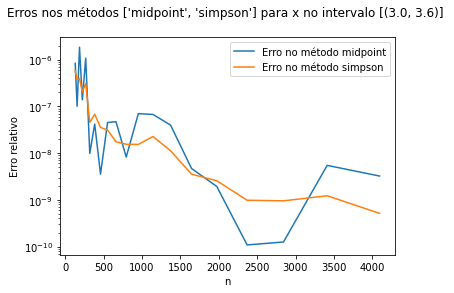

In [18]:
l, r = I_x(0, 6, np.pi, 10)
ns = np.logspace(7, 12, num=20, dtype=int, base=2)
exact_answer = F(r) - F(l)

ax = plt.gca()
plot_methods_errs_for_ns(f, l, r, ns, methods, exact_answer, semilog=True)  

In [19]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [20]:
for l in ax.lines:
    assert 1e-10 < min(l.get_ydata()) < 1e-7

Quanto do erro de cada método é causado pelo erro em apenas um intervalo?

Faça um gráfico comparando esses erros

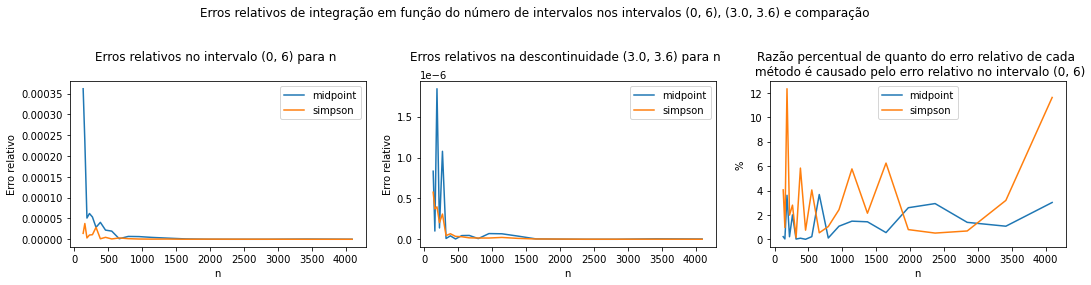

In [21]:
a, b = 0, 6
l, r = I_x(0, 6, np.pi, 10)
methods = [midpoint, simpson]

fig, axs = plt.subplots(ncols=3, figsize=(15,4), sharey=False)

interval_methods_errs = get_methods_errs_for_ns(f, a, b, ns, methods, F(b) - F(a))
descontinuity_methods_errs = get_methods_errs_for_ns(f, l, r, ns, methods, F(r) - F(l))

axs[0].plot(ns, interval_methods_errs[methods[0]], label=methods[0].__name__)
axs[0].plot(ns, interval_methods_errs[methods[1]], label=methods[1].__name__)
axs[0].set_xlabel("n")
axs[0].set_ylabel("Erro relativo")
axs[0].set_title(f"Erros relativos no intervalo {a, b} para n \n")
axs[0].legend()

axs[1].plot(ns, descontinuity_methods_errs[methods[0]], label=methods[0].__name__)
axs[1].plot(ns, descontinuity_methods_errs[methods[1]], label=methods[1].__name__)
axs[1].set_xlabel("n")
axs[1].set_ylabel("Erro relativo")
axs[1].set_title(f"Erros relativos na descontinuidade {l, r} para n \n")
axs[1].legend()


ratios_percentagem_from_methods = {}
for method in methods:
    interval_method_errs = interval_methods_errs[method]
    descontinuity_method_errs = descontinuity_methods_errs[method]
    ratios = 100*(descontinuity_method_errs / interval_method_errs)
    ratios_percentagem_from_methods[method] = ratios
    
axs[2].plot(ns, ratios_percentagem_from_methods[methods[0]], label=methods[0].__name__)
axs[2].plot(ns, ratios_percentagem_from_methods[methods[1]], label=methods[1].__name__)
axs[2].set_xlabel("n")
axs[2].set_ylabel("%")
axs[2].set_title(f"Razão percentual de quanto do erro relativo de cada \n método é causado pelo erro relativo no intervalo {a, b}")
axs[2].legend()

fig.suptitle(f"Erros relativos de integração em função do número de intervalos nos intervalos {a, b}, {l, r} e comparação \n")
fig.tight_layout() # Ajusta o espaçamento entre os gráficos

Mude a integral de $[0,6]$ por duas integrais, uma em $[0,\pi]$ e outra em $[\pi,6]$.
Faça um gráfico comparando os erros dos 4 métodos:
- Ponto médio vs Simpson
- Integral única vs Integral em 2 partes

Cuide de usar o mesmo número $n$ total de sub-intervalos, para não "roubar" em favor do que usa 2 intervalos :-)

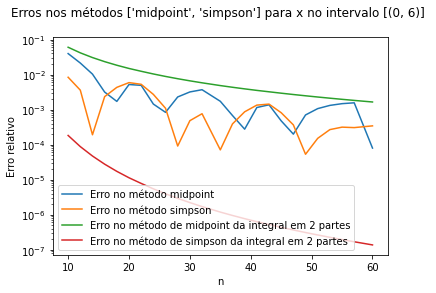

In [22]:
a, c, b = 0, np.pi, 6
ns = np.linspace(10, 60, num=25, dtype=int)
methods = [midpoint, simpson]

# Para não "roubar" em favor da integral que usa 2 intervalos,
# fazemos com que o valor dos hs nos 2 intervalos da integral dupla
# seja similar ao valor dos hs na integral única e que o número total
# de subintervalos seja igual nos dois casos. Mas nota-se que, para
# valores baixos de n, a aproximação necessária para converter hs em
# um número de intervalos (ns) pode causar uma grande diferença entre
# os hs da integral única e os hs em cada intervalo da integral dupla.
hs = (b - a) / ns
first_part_ns = np.round((c - a) / hs).astype(int)
second_part_ns = ns - first_part_ns
assert np.all(first_part_ns + second_part_ns == ns)

first_part_methods_errs = get_methods_errs_for_ns(f, a, c, first_part_ns , methods, F(c) - F(a))
second_part_methods_errs = get_methods_errs_for_ns(f, c, b, second_part_ns, methods,  F(b) - F(c))

ax = plt.gca()

# Plotando os erros da integral única
plot_methods_errs_for_ns(f, a, b, ns, methods, F(b) - F(a), semilog=True)

# Plotando os erros da integral em duas partes
for i, method in enumerate(methods):
    summed_errs = first_part_methods_errs[method] + second_part_methods_errs[method]
    plt.semilogy(ns, summed_errs, label=f"Erro no método de {method.__name__} da integral em 2 partes")
    plt.legend()

In [23]:
assert len(ax.lines) == 4
assert len(ax.legend().texts) == 4

O que você observa?
O que você conclui?

Observa-se que os erros (relativos) na integral em duas partes para ambos os métodos decai de maneira bem comportada, como esperado do cálculo do erro a partir da série de Taylor da função |sen(x)| onde o domínio da sua derivada é contínuo. 

Para o caso das integral única, por outro lado, observa-se o mesmo comportamento observado ao longo do teste, com variações mais ou menos periódicas do erro em função de n devido à grande imprecisão da interpolação no intervalo onde a derivada é contínua.

Em termos de qual abordagem é melhor, nota-se que não há uma resposta óbvia, já que o caso em duas partes gerou erros menores para o método de Simpson, mas erros maiores para o método midpoint. 

Não obstante, depreende-se dos gráficos que a divisão de subintervalos em uma integral onde existem pontos problemáticos em seu domínio pode ser uma abordagem eficiente para atenuá-los ou gerar um comportamento mais previsível.